In [11]:
import io
import re

import numpy as np
import matplotlib.pyplot as plt

class Re(object):
  def __init__(self):
    self.last_match = None
  def match(self,pattern,text):
    self.last_match = re.match(pattern,text)
    return self.last_match
  def search(self,pattern,text):
    self.last_match = re.search(pattern,text)
    return self.last_match

In [12]:
INPUT_FILE = "Parasitics/SingleStage_Cfp_Sweep.txt"

lines = [];
sweeps = dict();
current_step = None;

def setup_sweep(key):
    global sweeps;

    if(key in sweeps):
        return;
    
    sweeps[key] = {
        "sweep" : key
    };


with io.open(INPUT_FILE, mode="r", encoding="ISO8859") as file:
    header = file.readline();
    lines = header.rstrip("\n").split("\t");
    
    for line in file:
        line = line.rstrip("\n");
        lre = Re();
        
        if lre.search("^Freq", line):
            next;
        elif lre.search("^Step Information: (.*)  \(Step: .*\)$", line):
            current_sweep = lre.last_match[1];
        else:
            setup_sweep(current_sweep);
            sweep = sweeps[current_sweep];
            
            elements = line.split("\t");
            for idx, element in enumerate(elements):
                lname = lines[idx];
                ere = Re();
                if ere.search("^([\d\.e\+-]+)$", element):
                    if(not lname in sweep):
                        sweep[lname] = []
                    sweep[lname].append(float(ere.last_match[1]));
                elif ere.search("^\(([\d\.e\+-]+)dB,([\d\.e\+-]+)", element):
                    if(not (lname+" dB") in sweep):
                        sweep[lname+" dB"] = []
                        sweep[lname+" deg"] = []
                    sweep[lname+" dB"].append(float(ere.last_match[1]));
                    sweep[lname+" deg"].append(float(ere.last_match[2]));
                else:
                    raise RuntimeError("Unknown/Not configured parsing element!");

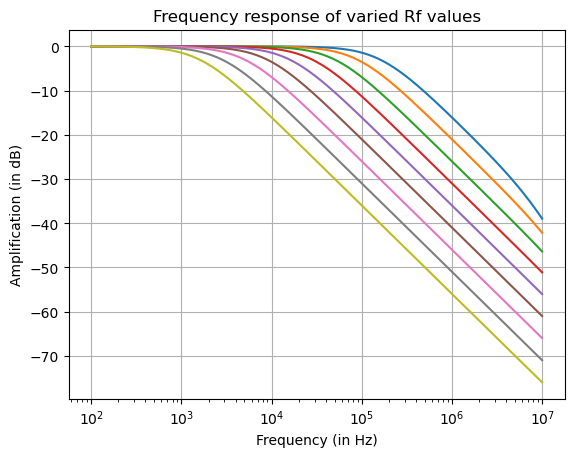

In [13]:
for sweep_key in sweeps.keys():
    plt.semilogx(sweeps[sweep_key]['Freq.'], sweeps[sweep_key]['V(n002) dB']);

plt.grid(True);
plt.xlabel("Frequency (in Hz)");
plt.ylabel("Amplification (in dB)");
plt.title("Frequency response of varied Rf values");